# 생물정보학 및 실습 1 - Term Project

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2022년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.


### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [1]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C . -xf -

--2022-05-26 22:58:25--  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Resolving hyeshik.qbio.io (hyeshik.qbio.io)... 147.47.203.129
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6424668160 (6.0G) [application/octet-stream]
Saving to: ‘STDOUT’

-                   100%[===================>]   5.98G  98.6MB/s    in 59s     

2022-05-26 22:59:24 (104 MB/s) - written to stdout [6424668160/6424668160]



### 파일 체크섬 확인

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [2]:
!md5sum binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  binfo1-datapack1/CLIP-35L33G.bam.bai
23c55065f84b49ccb9d5192ee3b969cd  binfo1-datapack1/CLIP-let7d.bam
8f0013aa795510f597e241c1b69e6341  binfo1-datapack1/CLIP-let7d-gene.pileup
8f0013aa795510f597e241c1b69e6341  binfo1-datapack1/CLIP-let7d.pileup
8447b82f3a334603779b236b317a6f0e  binfo1-datapack1/CLIP-let7f-1.bam
1c34f27bcc5f407e54d8112938bc9d2c  binfo1-datapack1/CLIP-let7f-1-gene.pileup
9b172b22ce452b8f7ef1b02dcf61516b  binfo1-datapack1/CLIP-let7f-1.pileup
ae2bffafe63583d973e9dff38bba8a1f  binfo1-datapack1/CLIP-let7g.bam
4ea14471c5d4bf9ab1fd91b9a5b2193c  binfo1-datapack1/CLIP-let7g-gene.pileup
a53f66a5575d4ac2d3b4c44af576d44d  binfo1-datapack1/CLIP-let7g.pileup
68080885670e291c8dcce54948419b5c  binfo1-datapack1/entropy.bedgraph
a3ada1f20f6f18cb93de20903bda5667  binfo1-datapack1/filtered-RPF-siLuc.bam
2b5021d2ac3d4830fd963d950a2dc0b8  binfo1-datapack1/fivepcounts-filtered-RPF-siLuc.txt
7

실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [3]:
!conda install -y bedtools
!pip install -y seqfold

Solving environment: done

# All requested packages already installed.



In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

binding_sites = pd.read_csv("binding_sites_fold.tsv", sep="\t").dropna()
binding_sites_control = pd.read_csv("binding_sites_control.pileup", sep="\t", header=None, usecols=[0,1,3], names=["chr", "pos", "depth_control"])
binding_sites = binding_sites.merge(binding_sites_control, on=["chr", "pos"], how="left").dropna()
binding_sites["enrichment"] = np.log2((binding_sites["depth"] + 1) / (binding_sites["depth_control"] + 1))
binding_sites = binding_sites[binding_sites["sequence"].str.len() == 21]
binding_sites = binding_sites.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
display(binding_sites)

,sequence,chr,pos,gene,transcript,pos_t,depth,entropy,folding,depth_control,enrichment
1,AAAAAAAAAAAAAAAAAAAAA,chr1,34503357,ENSMUSG00000026126.16,ENSMUST00000186252.2,905,14,0.830472,...................(),138.0,-3.212050
2,AAAAAAAAAAAAAAAAAAAAA,chr2,126551095,ENSMUSG00000027364.15,ENSMUST00000136319.8,2050,14,1.039721,...................(),9.0,0.584963
3,AAAAAAAAAAAAAAAAAAAAA,chr3,20162703,ENSMUSG00000002428.13,ENSMUST00000155635.2,64,18,1.054920,...................(),4.0,1.925999
4,AAAAAAAAAAAAAAAAAAAAC,chr1,9991475,ENSMUSG00000046101.17,ENSMUST00000052843.12,1551,15,0.882311,...................(),38.0,-1.285402
5,AAAAAAAAAAAAAAAAAAAAC,chr1,9991475,ENSMUSG00000046101.17,ENSMUST00000118098.3,2056,15,0.882311,...................(),38.0,-1.285402
...,...,...,...,...,...,...,...,...,...,...,...
90815,TTTTTTTTTTTTTTTTTTTCA,chr7,45122954,ENSMUSG00000011382.9,ENSMUST00000011526.7,2780,15,1.039721,................(...),38.0,-1.285402
90816,TTTTTTTTTTTTTTTTTTTGG,chr3,131082809,ENSMUSG00000027983.14,ENSMUST00000106337.7,3659,20,0.900256,...................(),2.0,2.807355
90817,TTTTTTTTTTTTTTTTTTTTT,chr1,156353175,ENSMUSG00000101523.3,ENSMUST00000190422.3,1594,27,0.933824,...................(),7.0,1.807355
90818,TTTTTTTTTTTTTTTTTTTTT,chr14,52493163,ENSMUSG00000053754.15,ENSMUST00000199135.2,2018,11,1.052923,...................(),18.0,-0.662965


## Most frequent combination of hexamer and flanking sequence
-2 위치에서 +4까지 걸쳐 있는 hexamer와 주위 2bp sequence content의 빈도. Flanking sequence가 서로 상보적인 것을 관찰할 수 있다.

In [201]:
sequence_partitioned = pd.DataFrame(
    [
        binding_sites["sequence"].str[8:14].rename("hexamer"),
        binding_sites["sequence"].str[6:8].rename("left flank"),
        binding_sites["sequence"].str[14:16].rename("right flank"),
        binding_sites["enrichment"],
    ]
).T.assign(count=1)
sequence_partitioned["flank"] = sequence_partitioned["left flank"] + "..." + sequence_partitioned["right flank"]


In [202]:
sort_by="count"
display(sequence_partitioned.groupby("hexamer").agg({"count": "sum", "enrichment": "median"}).sort_values(by=sort_by, ascending=False).head(10))
display(sequence_partitioned.groupby("flank").agg({"count": "sum", "enrichment": "median"}).sort_values(by=sort_by, ascending=False).head(10))
display(sequence_partitioned.groupby(["hexamer", "flank"]).agg({"count": "sum", "enrichment": "median"}).reset_index().sort_values(by=sort_by, ascending=False).head(10))

,count,enrichment
hexamer,,
AAGGAG,1876,2.001435
AAGAGA,1558,1.605197
GAGGAG,1271,1.469485
AAGAGG,1191,1.592122
AAGAAG,1063,1.807355
AAGGTG,990,1.321928
GAGAAG,786,1.440573
AAGAGC,749,1.445800
CAGAGA,717,1.000000


,count,enrichment
flank,,
CC...GG,1457,0.958180
CA...TG,1318,1.165586
AG...CT,1163,1.494765
GG...CC,1093,0.953607
GC...GC,1022,0.900464
CT...AG,998,1.412126
TC...GA,903,1.289507
AA...TG,826,1.605197
AA...AA,800,1.201634


,hexamer,flank,count,enrichment
1758,AAGGAG,AG...CT,106,2.846087
1880,AAGGAG,TG...CA,87,1.627088
15172,GAGGAG,AG...CT,79,0.600393
1721,AAGGAG,AA...AA,68,2.222392
677,AAGAGA,GG...TG,62,0.250808
1339,AAGCAG,CT...AG,56,3.824428
921,AAGAGG,GC...CA,54,2.631893
14257,GAGAAG,AT...AT,53,0.945960
647,AAGAGA,GA...AG,53,2.169925
9088,CAGAGG,AG...CT,49,1.967522


## 전체 binding site 대상 base pairing 양상 조사
Transcriptome 상에서 candidate binding site 기준으로 (-3, +5), (-4, +6), (-5, +7), (-6, +8), (-7, +9) 위치에서 Watson-Crick base pairing이 잘 형성된다.
-2에서 +4까지 single strand 상태로 있는 경향이 크다.

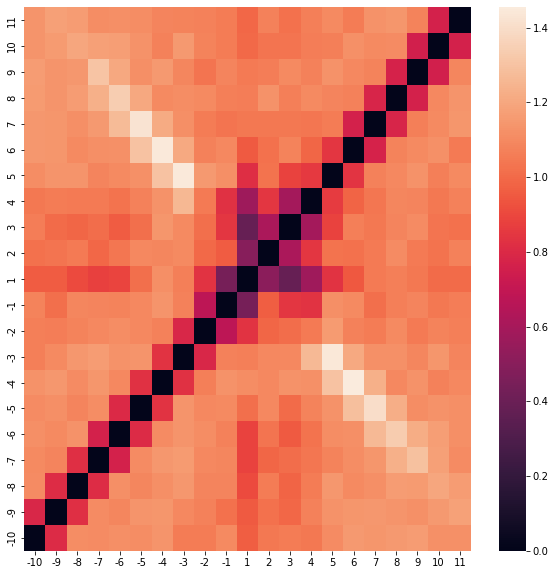

In [203]:
# Watson-Crick base pairing
REVERSE_COMPLEMENT = {
    "A": "T",
    "T": "A",
    "G": "C",
    "C": "G",
    "R": "Y",
    "Y": "R",
    "N": "N",
}


def get_reverse_complement(sequence):
    new_sequence = ""
    for base in sequence[::-1]:
        try:
            new_sequence += REVERSE_COMPLEMENT[base]
        except:
            new_sequence += "N"

    return new_sequence

def get_similarity(x: pd.Series):
    return (x["sequence"] == x["sequence_rc"].reshape(-1, 1)).astype("int")

def get_similarity_with_replacement(x: pd.Series, index):
    return (np.random.permutation(x["sequence"][index]) == np.random.permutation(x["sequence_rc"][index]).reshape(-1, 1)).astype("int")

index = np.random.permutation(np.arange(21))
sequence = pd.DataFrame(columns=["sequence", "sequence_rc"])
sequence["sequence"] = binding_sites["sequence"].apply(list).apply(np.array)
sequence["sequence_rc"] = binding_sites["sequence"].apply(get_reverse_complement).apply(list).apply(np.array)
sequence = sequence[sequence["sequence"].apply(len) == 21]
can_pair = sequence.apply(get_similarity, axis=1)
can_pair_background = sequence.apply(lambda x: get_similarity_with_replacement(x, index), axis=1)
base_pair_rate = can_pair[can_pair.apply(len) == 21].sum(axis=0) / len(can_pair)
base_pair_rate_background = can_pair_background[can_pair_background.apply(len) == 21].sum(axis=0) / len(can_pair_background)
base_pair_rate_normed = pd.DataFrame(base_pair_rate / base_pair_rate_background, index=np.concatenate([np.arange(-10, 0), np.arange(1, 12)])[::-1], columns=np.concatenate([np.arange(-10, 0), np.arange(1, 12)]))
annot = np.diag(np.concatenate([np.arange(-10, 0), np.arange(1, 12)]))

plt.figure(figsize=(10, 10))
sns.heatmap(base_pair_rate_normed)
plt.show()


## base pairing 과 CLIP enrichment 사이 관계

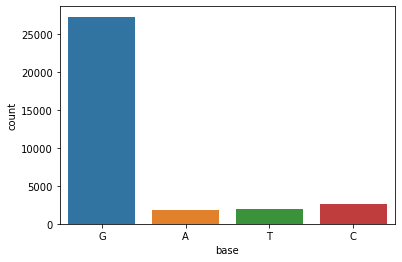

,sequence,chr,pos,gene,transcript,pos_t,depth,entropy,folding,depth_control,enrichment,wrapped_sequence,len_wrapped,hexamer
32060,CCAAAGAAGAGTAGTTCTAGT,chrX,104920883,ENSMUSG00000031229.17,ENSMUST00000113573.8,1240,5855,0.990886,....((((......))))...,9.0,9.193772,GA*TAG,6.0,GAGTAG
32061,CCAAAGAAGAGTAGTTCTAGT,chrX,104920883,ENSMUSG00000031229.17,ENSMUST00000128968.8,1086,5855,0.990886,....((((......))))...,9.0,9.193772,GA*TAG,6.0,GAGTAG
32062,CCAAAGAAGAGTAGTTCTAGT,chrX,104920883,ENSMUSG00000031229.17,ENSMUST00000198448.5,1066,5855,0.990886,....((((......))))...,9.0,9.193772,GA*TAG,6.0,GAGTAG
32063,CCAAAGAAGAGTAGTTCTAGT,chrX,104920883,ENSMUSG00000031229.17,ENSMUST00000134507.8,1399,5855,0.990886,....((((......))))...,9.0,9.193772,GA*TAG,6.0,GAGTAG
32064,CCAAAGAAGAGTAGTTCTAGT,chrX,104920883,ENSMUSG00000031229.17,ENSMUST00000150914.8,1603,5855,0.990886,....((((......))))...,9.0,9.193772,GA*TAG,6.0,GAGTAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,CAAAATGCCTGAGCTGTTGAA,chr10,127952575,ENSMUSG00000040054.18,ENSMUST00000170054.9,2175,13,1.036199,(((...((....))..)))..,1153.0,-6.365073,CT*A,4.0,CTGAGC
25275,CAAAATGCCTGAGCTGTTGAA,chr10,127952575,ENSMUSG00000040054.18,ENSMUST00000220049.2,2246,13,1.036199,(((...((....))..)))..,1153.0,-6.365073,CT*A,4.0,CTGAGC
25279,CAAAATGCCTGAGCTGTTGAA,chr10,127952575,ENSMUSG00000040054.18,ENSMUST00000219980.2,2166,13,1.036199,(((...((....))..)))..,1153.0,-6.365073,CT*A,4.0,CTGAGC
25511,CAAAGGAGCAGTCCAGGCTCG,chr6,125111515,ENSMUSG00000038279.11,ENSMUST00000044200.11,347,15,1.039721,.....((((.......)))).,1322.0,-6.369597,A*TCCAG,7.0,CAGTCC


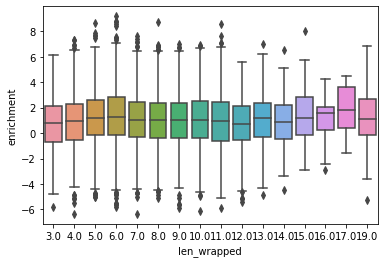

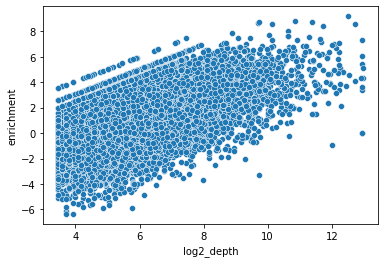

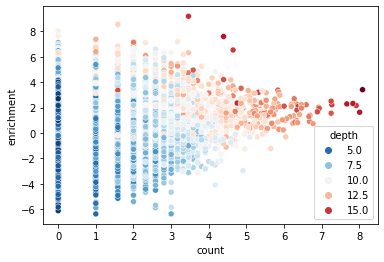

/blaze/hansb/conda/envs/lab/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2996799/1416854588.py:72: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .assign(fold_strength=binding_sites_display["folding"].str.replace(".", "").str.len())


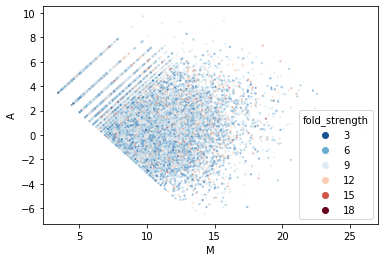

In [235]:
def get_wrapped_sequence(site: pd.Series):
    start = site["folding"].rfind("(") + 1
    end = site["folding"].find(")") - 1
    sequence = site["sequence"][start:end+1]
    sequence = np.nan if start >= 10 or end <= 10 else sequence[:10-start] + "*" + sequence[11-start:]
    # sequence = np.nan if start >= 10 or end <= 10 else sequence[:10-start] + sequence[10-start].lower() + sequence[11-start:]
    
    return sequence

binding_sites_disp = (
    binding_sites
    .assign(
        wrapped_sequence=binding_sites.apply(get_wrapped_sequence, axis=1)
    )
    .assign(len_wrapped=binding_sites.apply(get_wrapped_sequence, axis=1).str.len())
    .assign(hexamer=binding_sites["sequence"].str[8:14]) 
    .sort_values("enrichment", ascending=False)
)
sns.countplot(data=binding_sites_disp.assign(is_wrapped=~binding_sites_disp["wrapped_sequence"].isna(), base=binding_sites_disp["sequence"].str[10])[["is_wrapped", "base", "chr", "pos"]].drop_duplicates(), x="base")
plt.show()
binding_sites_display = binding_sites_disp.dropna()
display(binding_sites_display)



sns.boxplot(
    data=(
        binding_sites_display
        .groupby(["chr", "pos", "hexamer", "wrapped_sequence"])
        .median()[["len_wrapped", "enrichment"]]
    ), 
    x="len_wrapped", 
    y="enrichment"
)
plt.show()


sns.scatterplot(
    data=(
        binding_sites_display
        .assign(log2_depth=binding_sites_display["depth"].apply(np.log2))
        .groupby(["chr", "pos", "hexamer", "wrapped_sequence"])
        .median(["enrichment", "log2_depth"])
    ), 
    x="log2_depth", 
    y="enrichment"
)
plt.show()

sns.scatterplot(
    data=(
        binding_sites_display
        .assign(count=1)
        .groupby(["hexamer", "wrapped_sequence"])
        .agg({"enrichment": "median", "count": "sum", "depth": "sum"})
        .apply(lambda x: np.log2(x) if x.name in ("depth", "count") else x)
    ), 
    x="count", 
    y="enrichment",
    hue="depth",
    palette="RdBu_r"
)
plt.show()

sns.scatterplot(
    data=(
        binding_sites_display
        .assign(M=np.log2(binding_sites_display["depth"] * binding_sites_display["depth_control"]))
        .assign(A=np.log2(binding_sites_display["depth"] / binding_sites_display["depth_control"]))
        .assign(len_wrapped=binding_sites.apply(get_wrapped_sequence, axis=1).str.len())
        .assign(g_ratio=binding_sites_display["wrapped_sequence"].str.count("T").divide(binding_sites_display["wrapped_sequence"].str.len()))
        .assign(fold_strength=binding_sites_display["folding"].str.replace(".", "").str.len())
        .groupby(["chr", "pos", "hexamer", "wrapped_sequence"])
        .median()
    ), 
    x="M", 
    y="A",
    hue="fold_strength",
    palette="RdBu_r",
    s=5,
    alpha=0.5
)
plt.show()

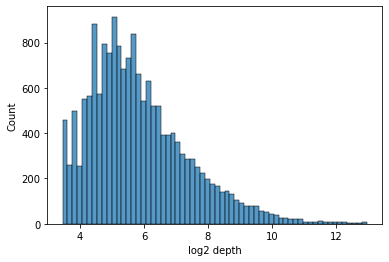

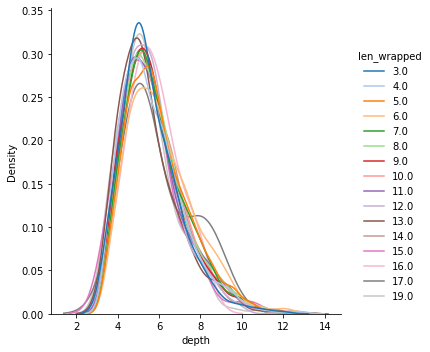

In [295]:
sns.histplot(
    data=binding_sites_display.groupby(["chr", "pos", "gene", "sequence", "wrapped_sequence", "depth"]).agg({"enrichment": "median", "len_wrapped": "median"}).sort_values("depth", ascending=False).reset_index().apply(lambda x: np.log2(x) if x.name =="depth" else x),
    x="depth",
)
plt.xlabel("log2 depth")
plt.show()
sns.displot(
    data=binding_sites_display.groupby(["chr", "pos", "gene", "sequence", "wrapped_sequence", "depth"]).agg({"enrichment": "median", "len_wrapped": "median"}).sort_values("depth", ascending=False).reset_index().apply(lambda x: np.log2(x) if x.name =="depth" else x),
    x="depth",
    hue="len_wrapped",
    kind="kde",
    palette="tab20",
)
plt.show()
freq_sequences = binding_sites_display.groupby(["chr", "pos", "gene", "sequence", "wrapped_sequence"]).agg({"enrichment": "median", "depth": "median"}).reset_index()
freq_sequences = freq_sequences[(freq_sequences["wrapped_sequence"].str.len() > 5) & (freq_sequences["depth"] > 2 ** 8)]["wrapped_sequence"].drop_duplicates()

In [206]:
from scipy.spatial.distance import hamming
def get_align_distance(seq1: str, seq2: str):
    idx1, idx2 = seq1.index("*"), seq2.index("*")
    return hamming(
        list(seq1[idx1 - min(idx1, idx2):idx1+min(len(seq1) - idx1, len(seq2) - idx2)]),
        list(seq2[idx2 - min(idx1, idx2):idx2+min(len(seq1) - idx1, len(seq2) - idx2)])
    )
pdist = np.vectorize(get_align_distance)(freq_sequences.to_numpy(),freq_sequences.to_numpy().reshape(-1, 1))

In [207]:
from sklearn.cluster import AgglomerativeClustering
k=10
clustering = AgglomerativeClustering(
    n_clusters=k, 
    affinity="precomputed",
    linkage="average"
).fit(pdist)
cluster_result = freq_sequences.to_frame().assign(cluster=clustering.labels_).sort_values("cluster")

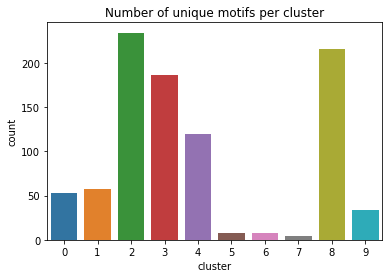

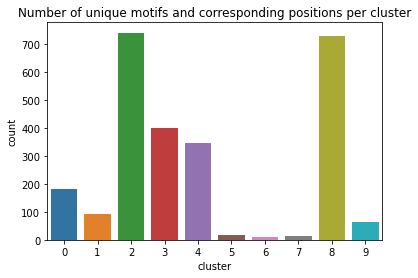

In [208]:
plt.title("Number of unique motifs per cluster")
sns.countplot(data=cluster_result, x="cluster")
plt.show()
sns.countplot(data=cluster_result.merge(binding_sites_display, how="left", left_on="wrapped_sequence", right_on="wrapped_sequence")[["chr", "pos", "wrapped_sequence", "cluster"]].drop_duplicates(), x="cluster")
plt.title("Number of unique motifs and corresponding positions per cluster")
plt.show()

In [209]:
cluster_result.assign(
    left=cluster_result["wrapped_sequence"].str.split("*").str[0],
    right=cluster_result["wrapped_sequence"].str.split("*").str[1]
).to_csv("cluster_result.tsv", sep="\t", index=False)

In [219]:
import uuid

for _, row in cluster_result[cluster_result["cluster"] == 2].merge(binding_sites_display, how="left", left_on="wrapped_sequence", right_on="wrapped_sequence")[["chr", "pos", "sequence", "cluster"]].sort_values(by=["chr", "pos"]).drop_duplicates().iterrows():
    print(f">{row['chr']}:{row['pos']}|{uuid.uuid4()}".split("-")[0])
    print(row["sequence"])

>chr1:6507740|89746610
AGGCCTTGGAGGAGCAAGGAC
>chr1:10117654|6b3dc2ef
TGAAGGGAAAGGCGTCAGAGA
>chr1:10117654|9c766f0a
GGAGGGGAAAGGCGTCAGAGA
>chr1:10259702|791d6c00
AATTGCCCAAGGAAGGGGCAG
>chr1:15831038|dfe2d0ee
TCTGAGCACTGGAGAGAAAGG
>chr1:34853097|728500c8
GCTTTCTGAGGGTTGCAGAGG
>chr1:34855614|1507fd57
TGTCTTCCTAGGAGGGAAGAT
>chr1:38113427|34dad07d
ATGCAGGGAAGTTGCCCAGGC
>chr1:46865321|ef685e7b
TGTGGCGCTAGGAGGCATTTA
>chr1:47697146|2d166780
GAATGATGCAGGCAGGCCCAA
>chr1:51808205|b0ed6a35
AGCGCTGTAAGGAGGCAGCCA
>chr1:55123744|2d4fd35f
CTATTGCCAAGGAGGGCTTTG
>chr1:58519429|187cd341
CAGAGGCTGAGGAGAGCCAGA
>chr1:58568511|c85d2954
GTGAGACTGAGGAGATGTCGA
>chr1:58686308|7f174fcf
TGCTGGCAAAGGAGGCGAACA
>chr1:61115070|32f8322f
CTGGACACAGGGTCGGTGGCC
>chr1:62855268|72cd5cf0
GAAAAGCAAAGGGGCTTTTCA
>chr1:78643670|43b6581c
GGAACAACAAGGAGAGTTGAG
>chr1:84990046|084d40f3
CTGGCCCGACGGAAGGGCAGG
>chr1:86278645|09b1426a
CAAACCTAAGGGTGAAGGTGG
>chr1:86285898|1cdd5c05
CTCCTCCAAAGGAGGTGGAAG
>chr1:89026328|274c63d7
TGGCAGCCACC

In [273]:
display(binding_sites_disp[binding_sites_disp["wrapped_sequence"].isna()]["sequence"].str[8:14].to_frame().assign(count=1).groupby("sequence").sum().sort_values("count", ascending=False).head(10))
freq_sequences = binding_sites_disp[binding_sites_disp["wrapped_sequence"].isna()]["sequence"].str[8:14].drop_duplicates()
freq_sequences

,count
sequence,
AAGGAG,775
AAGAGA,742
GAGGAG,566
AAGAGG,465
CAGAGA,450
AAGGTG,442
AAGAAG,425
ATGAGA,354
GAGAGA,324


33570    ACGAAG
89247    GAGAGG
20282    AAGCGA
3909     CAGGGG
57600    CGGTGG
          ...  
79895    TCACCT
71797    ATATCG
4830     ACCCCT
37899    GACGGT
37153    GCCAGA
Name: sequence, Length: 2695, dtype: object

In [274]:
def get_distance(seq1: str, seq2: str):
    return hamming(list(seq1), list(seq2))

pdist = np.vectorize(get_distance)(freq_sequences.to_numpy(),freq_sequences.to_numpy().reshape(-1, 1))

In [288]:
from sklearn.cluster import AgglomerativeClustering
k=20
clustering = AgglomerativeClustering(
    n_clusters=k, 
    affinity="precomputed",
    linkage="average"
).fit(pdist)
cluster_result = freq_sequences.to_frame().assign(cluster=clustering.labels_).sort_values("cluster")

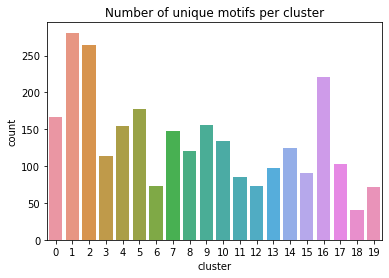

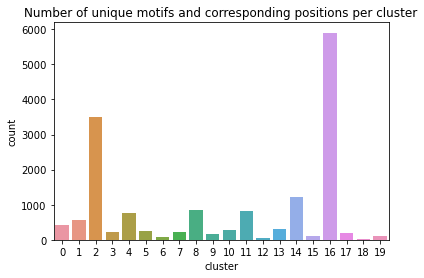

In [289]:
plt.title("Number of unique motifs per cluster")
sns.countplot(data=cluster_result, x="cluster")
plt.show()
sns.countplot(data=cluster_result.merge(binding_sites_display.assign(hexamer=binding_sites_display["sequence"].str[8:14]), how="left", left_on="sequence", right_on="hexamer")[["chr", "pos", "hexamer", "cluster"]].drop_duplicates(), x="cluster")
plt.title("Number of unique motifs and corresponding positions per cluster")
plt.show()

In [292]:
for s in cluster_result[cluster_result["cluster"] == 0].merge(binding_sites_display.assign(hexamer=binding_sites_display["sequence"].str[8:14]), how="left", left_on="sequence", right_on="hexamer")["sequence_y"].drop_duplicates().dropna():
    print(s)

ATCAGCTCCCCCTGCTGGGCG
AAGCTCCACCCCTGAGCAAGC
GCTCTTAACCCCTGAGCCATC
TTCAAACACCCCTGCTTGCTT
TGCTTCCCCCCCTGGGTCTTT
GAATTTGCCTCTTGCAAGGAC
GTCTACTCCTCTTGGGTGAAT
TGTCCTGGCTCTTGGGCTCCT
CTAGCCATCTCTTGCTTCGAC
CCAGCTTGCTCTTGCTGATAA
CAGATTCTCTCCTCTGAGTTT
AAGGGCCTCTCCTCCCATTGA
CTTCTGGGCTCCTCCAAGGGC
AATTGGATCTCCTCAGCATTT
ACCCTGAGCTCCTCCAGGCTG
TTACCGACCACTTCGTCGTCT
TCCCCAGACACTTCCTGACAC
GTGATGGCCGACTAGGCCATC
ATGATGCCCTCCAGGTCCATC
CAGGAGCCCTCCAGCTCTCTG
AGAGAGACCCCTTGGTCTTAC
CCAGAGCACCCTTGTCTTCCG
CAATTGACCCCTTGTCAACTT
ACAGTACTCCCTTGGTCTGAC
CAAATCACCACCTGAGAATTA
CTGTCCAACACCTGACCATTC
TTCTCGTCCACCTGAGAGAAG
AATAGATCCACCTGCTTATTT
ATGGGCCCCACCTGACCCAAC
CGGCATTGCACCTGACACTGT
ACGGGCGCTCACTTAGCCAGG
TTGTCACATCCCTTGCGTTCT
GCTCTTAACCTCTGAGCCATC
AGACAGTCCCTCTGACGGACA
ACCCTTAGCCTTTTACATGGT
TTTCCAGTCCTTTTGGGAAAC
AGTATTGGCCTTTTTCCTCTT
AATGCACCTCACTGACGCTGC
TCCAGCCTTTCATTCTGAGGT
CTGCCAAATTCATTGGTGCAG
ATCTTCTGCACTTGAGATTCT
CTGGAACTCACTTGTAGACCA
CAGCTTCCCACTTGAGCTGTT
CCTGGCCCCACTTGGCCATGG
CTTCTTATCACTTGGAGATTC
TCCAAGGCCA